In [1]:
# Smoothing removes the noise from the image
# blurring and smoothing is combined together to perform edge detection
# gamma corection can be applied on image to appear the image brighter of darker based on gamma value chosen
# as the gamma value goes greater than 1 the image goes darker and as the gamma value goes below 1 the image goes lighter.
# gamma = 1 for original image

# http://setosa.io/ev/image-kernels/

# gamma = value
# gamma_corrected_image = np.power(image, gamma)

In [109]:
# https://www.geeksforgeeks.org/python-image-blurring-using-opencv/

In [106]:
# If a blurred image is observed carefully then a common thing to notice is that image is smooth meaning edges are not observed.
# A filter used for blurring is also called low pass filter, because it allows low frequency to enter and stop high frequency.
# Here frequency means the change of pixel value. Around edge pixel value changes rapidly as blur image is smooth so high 
# frequency should be filtered out.

# Gamma correction

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# ".astype(np.float32)/255" is very important as if we remove this we will not get image if we change gamma to any other value
# other than 1. Dont know why?

def load():
    original = cv2.imread("data/bricks.jpg").astype(np.float32)/255
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    global img
    img = original.copy()

In [55]:
def imshow(image, figs=[10,10]):
    plt.figure(figsize = figs)
    plt.imshow(image, cmap = 'gray')

In [56]:
load()

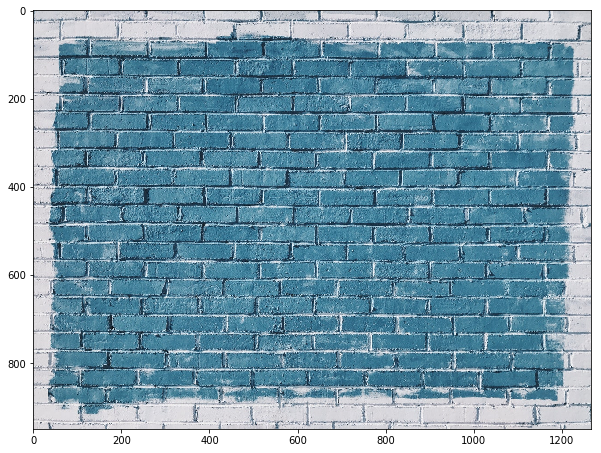

In [57]:
imshow(img)

In [50]:
gamma = 2

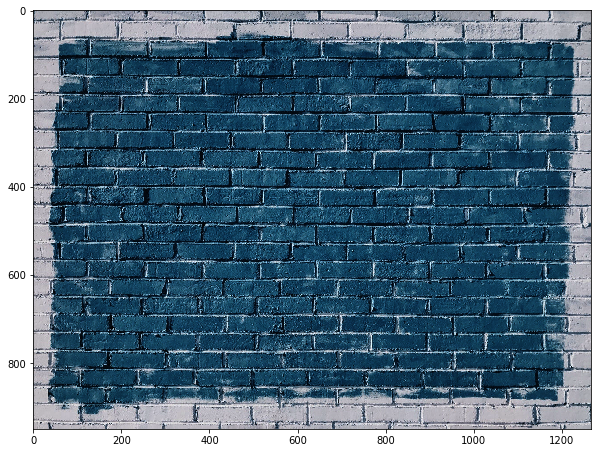

In [51]:
res = np.power(img, gamma)
imshow(res)

### gamma correction is not working

# <u>Kernel Method</u>

In [62]:
load()

In [75]:
# kernel = np.ones(shape=(5,5), dtype=np.float32)/5
kernel = np.ones(shape=(5,5), dtype=np.float32)/25

In [76]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

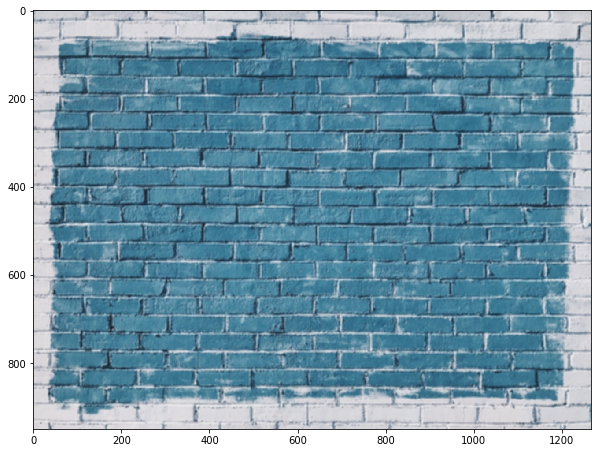

In [77]:
res = cv2.filter2D(img, -1, kernel)
imshow(res)

# Blurring using CV Blur Method

In [78]:
load()

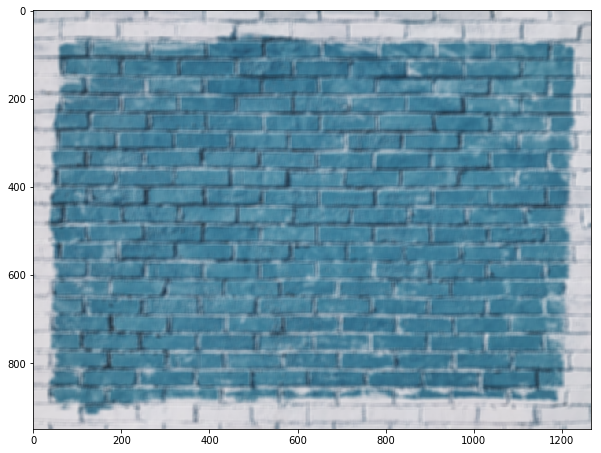

In [85]:
# bigger the kernel size higher the blur intensity
blurred = cv2.blur(img, ksize=(10, 10))
imshow(blurred)

# Gaussian Blur

In [86]:
# In Gaussian Blur operation, the image is convolved with a Gaussian filter instead of the box filter. 
# The Gaussian filter is a low-pass filter that removes the high-frequency components are reduced.

In [99]:
# src − representing the source (input image) for this operation.

# dst −  representing the destination (output image) for this operation.(optional)

# ksize − A Size object representing the size of the kernel.(positive and odd)(can be(0, 0), then kernel will be calculated by 
#                                                                              sigmaX)

# sigmaX − A variable of the type double representing the Gaussian kernel standard deviation in X direction.

In [87]:
load()

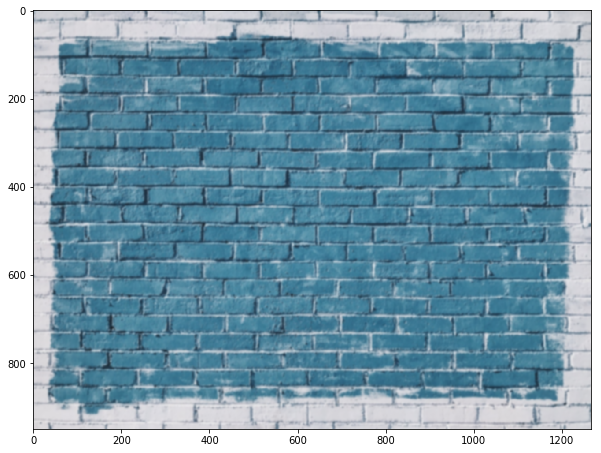

In [98]:
gaussBlur = cv2.GaussianBlur(src=img, ksize=(0,0), sigmaX=2)
imshow(gaussBlur)

# Median Blur

In [100]:
# it requires square kernel so it can convert 5 into 5x5 kernel

In [101]:
# The Median blur operation is similar to the other averaging methods. Here, the central element of the image is
# replaced by the median of all the pixels in the kernel area. This operation processes the edges while removing the noise.

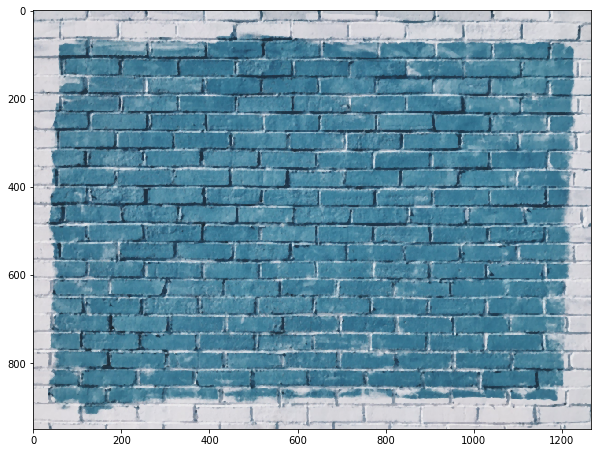

In [105]:
blurred = cv2.medianBlur(img, ksize=5)
imshow(blurred)

In [108]:
# median blur is better. as it removes noise

# Bilatral Blur

In [112]:
# Bilateral Blur: A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images.
# It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be
# based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.

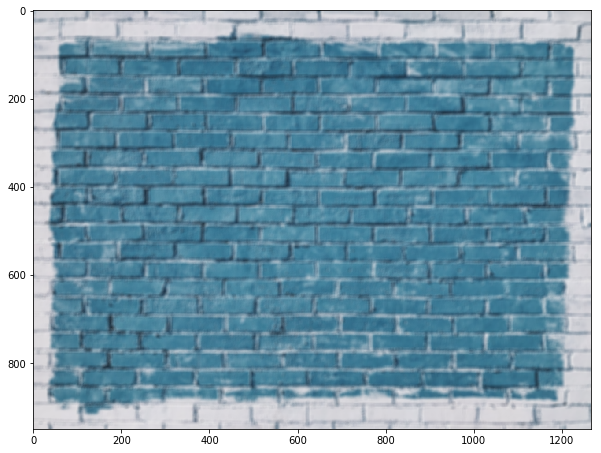

In [114]:
res = cv2.bilateralFilter(img, 10, 23,23)
imshow(res)